<a href="https://colab.research.google.com/github/SsemujjuWilliam/Breast-Cancer-Early-Detection/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data Analysis***

# **Importing Libraries**

In [ ]:
# Import Required liabraries
import warnings
import kagglehub
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


warnings.simplefilter(action='ignore',category= FutureWarning)

In [ ]:
# Create a Wrangle Function
def wrangle(data_path):
      """Downloads, reads, and returns a Pandas DataFrame from a Kaggle Hub dataset.
       Automatically finds the data file within the downloaded directory.

    Args:
        dataset_name: Kaggle Hub dataset name (e.g., "uciml/breast-cancer-wisconsin-data").

    Returns:
        pandas.DataFrame or None on error.
    """

      try:
        #Download lastest data set version
        path_directory = kagglehub.dataset_download(data_path)

        # Construct file path
        path_content = os.listdir(path_directory)
        data_files = [f for f in path_content if f.endswith((".csv", ".data", ".txt"))] # Add other extensions if needed

        if not data_files:
              raise FileNotFoundError("No CSV, data, or txt file found in the dataset directory.")
        if len(data_files) > 1:
              print("Warning: Multiple data files found. Reading the first one.") # Handle multiple files (if needed)
        file_name = data_files[0] # Get the first file name
        full_path = os.path.join(path_directory, file_name)

        # Read the csv file. Handle pontential errors (e.g file not found)
        df = pd.read_csv(full_path)  # Adjusting header=0  there's a header row

        #Create Binary Target Column
        df["diagnosis"] = [1 if value == "M" else 0 for value in df["diagnosis"]]
        df['diagnosis'] = df["diagnosis"].astype("category", copy = False)

        # Drop colums
        drop_cols = ["id","Unnamed: 32"]
        df.drop(columns= drop_cols, inplace=True,axis=1)

        return df
      except Exception as e:
        print (f"Error during data wrangling:{e}")
        return None    # Return None to indicate failure

In [ ]:
data = wrangle("uciml/breast-cancer-wisconsin-data")   # Our dataset name
# First Five records in the Dataset
data.head()

100%|██████████| 48.6k/48.6k [00:00<00:00, 37.8MB/s]

Extracting files...


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Exploratory Data Analysis(EDA)**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  area_se   

In [ ]:
# Columns in dataframe
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# stats behind the dataset
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


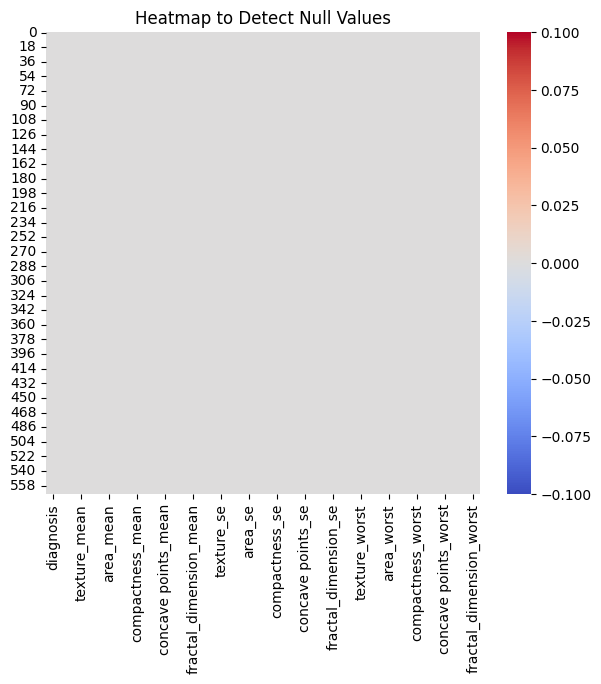

In [ ]:
# checking null values
#Adjust the size
plt.figure(figsize=(7,6))

# setup a title
plt.title('Heatmap to Detect Null Values')

#Plotting of heatmap
sns.heatmap(data.isnull(),cmap='coolwarm');

# **Univariate Analysis**

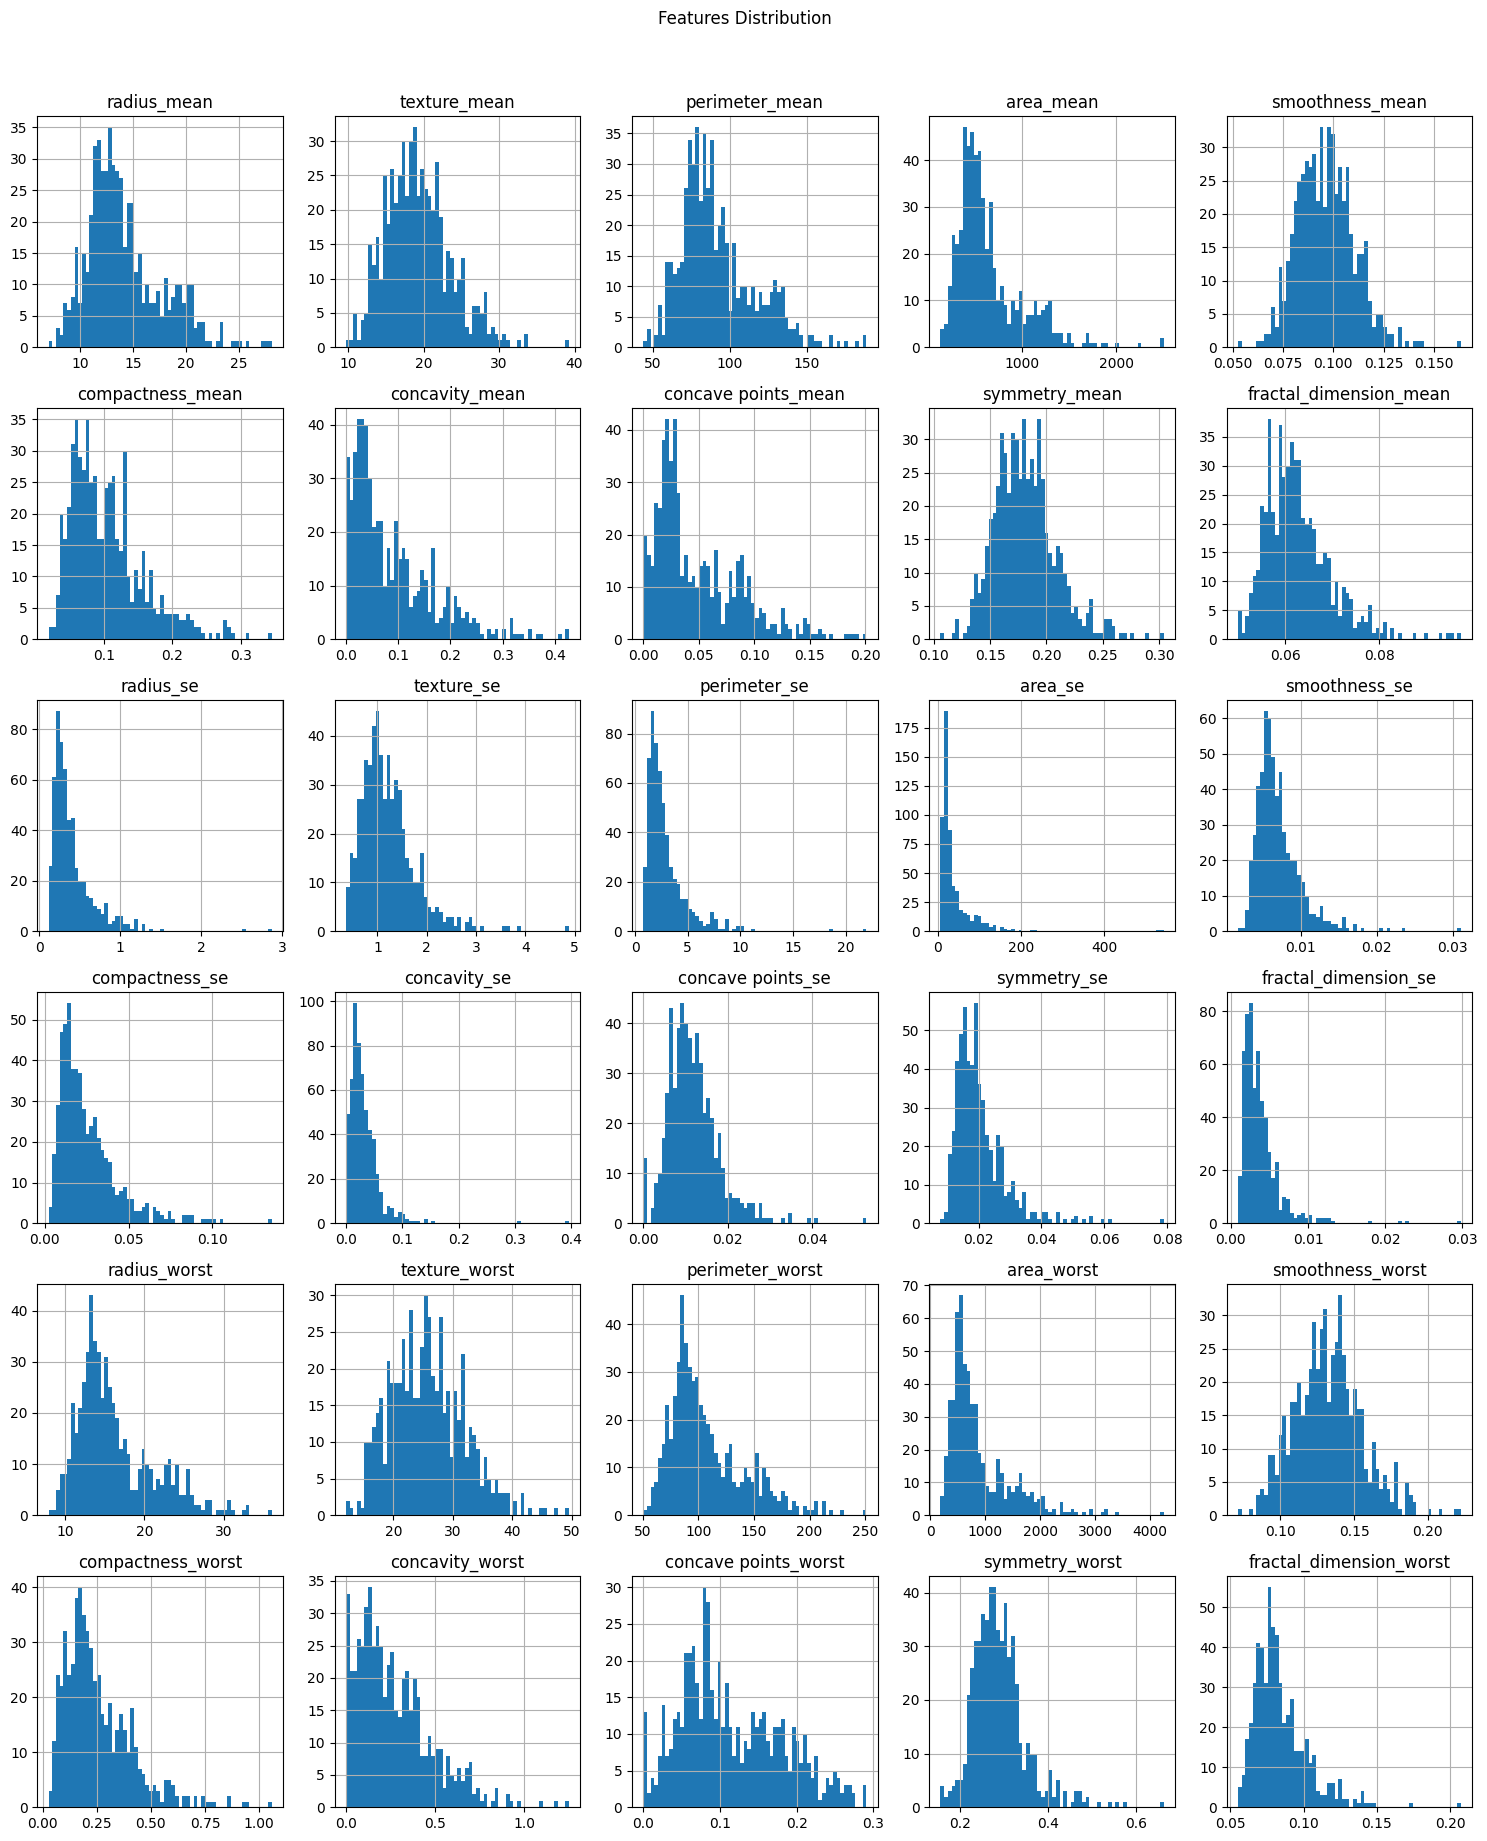

In [ ]:
# Making a features distribution histogram plot
data.hist(figsize=(15,18), bins =60)

# adding title
plt.suptitle('Features Distribution', x=0.5,y=1.02,ha='center',fontsize='large')

# Adjust the plot gaps
plt.tight_layout()



Conclusion
---


The visualization of feature distributions from the *Breast Cancer Wisconsin dataset* reveals a critical need for feature scaling before applying most machine learning algorithms.  The histograms demonstrate a wide disparity in the scales and ranges of different features.  For instance, "area_mean" spans orders of magnitude greater than "smoothness_mean" or "fractal dimension_mean." This difference in scale can **significantly bias algorithms** that rely on distance calculations or gradient descent.  Features with larger ranges can dominate the learning process, effectively overshadowing the influence of features with smaller ranges, even if those smaller-range features contain crucial information.  Furthermore, some algorithms, like Support Vector Machines (SVMs) and K-Nearest Neighbors (KNN), are particularly sensitive to feature scaling as they directly use distance metrics.  Without scaling, these algorithms may converge slowly, converge to suboptimal solutions, or produce models that are heavily influenced by a few dominant features, ultimately hindering predictive performance.  **Therefore, feature scaling, such as standardization or normalization, is an essential preprocessing step to ensure that all features contribute equitably to the model and to optimize the performance and reliability of machine learning models applied to this dataset**.


---


`



*Class Balance Chart*

<Axes: title={'center': 'Class Balance'}, xlabel='Class', ylabel='Relative Frequency'>

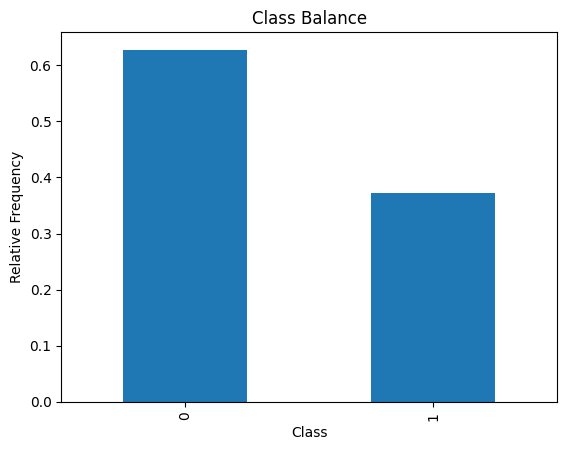

In [ ]:
# Plot value Counts of the Diagnosis
data["diagnosis"].value_counts(normalize = True).plot(kind ="bar",
                                                      xlabel="Class",
                                                      ylabel= "Relative Frequency",
                                                      title= "Class Balance")

In [ ]:
Majority_class_prop, minority_class_prop = data["diagnosis"].value_counts(normalize=True)
print("Majority_class_prop",Majority_class_prop)
print("Minority_class_prop",minority_class_prop)

Majority_class_prop 0.6274165202108963
Minority_class_prop 0.37258347978910367


# **Machine Learning**

***Train Test and Split***

In [ ]:
# splitting data into  X and y variables

# Dependent Variable
target = "diagnosis"
X= data.drop(columns= target)

# target or independet variable
y= data[target]

***Train  Test and Split***

In [ ]:
#spliting data into train and test variables
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.2,random_state=42)

#Train - Validation split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=42)

#Check the shapes of all variables which we create.
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_val shape:", y_val.shape)

X_train shape: (364, 30)
X_test shape: (114, 30)
X_val shape: (91, 30)
y_train shape: (364,)
y_test shape: (114,)
y_val shape: (91,)


In [ ]:
acc_baseline = y_train.value_counts(normalize=True).max()
print(acc_baseline)

0.6346153846153846


# **Iterate**

***Logistic Regression***

In [ ]:
# Hyperparameter tuning using a loop
best_accuracy = 0  # Initialize the best accuracy we have so far
best_c = None #Initialize the best hyperparameter c

# Iterate through different values of the hyperparameter C (regulqrization strength)
for C in range(0.01,100)
# create an object for the algorithm with current c value
    lr = make_pipeline(
       StandardScaler(),
       LogisticRegression(max_iter = 1000,C=C)
           )

#


In [ ]:
# fitting the training data
lr.fit (X_train, y_train)

#Prediction on test data
lr_pred = lr.predict(X_test)

# check the classification report of the Logistic Regression Model
print('Classification Report of Logistic Regression:\n')
print(classification)